In [18]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [59]:
image = cv2.imread('10OCT2014-0030.jpg')

In [60]:
cyclone_image = image[500:,200:,:]

In [61]:
kernel1 = np.ones( (3,3), dtype=np.uint8 )
erode_img1 = cv2.erode(cyclone_image,kernel1,iterations=2)
dil_img1 = cv2.dilate(erode_img1,kernel1,iterations=1)

In [62]:
gray_test_image = cv2.cvtColor(dil_img1, cv2.COLOR_BGR2GRAY)

In [63]:
scaled_gray_image = cv2.convertScaleAbs(gray_test_image, alpha=1.12, beta=-20)

In [64]:
def Hist(image):
    H = np.zeros(shape=256)
    s = image.shape
    for i in range(s[0]):
        for j in range(s[1]):
            k = image[i,j]
            H[k] += 1
    return H

In [65]:
hist_test_image = Hist(scaled_gray_image)

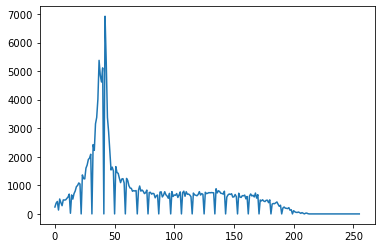

In [9]:
plt.plot(hist_test_image)

In [10]:
all_hist =[]
file_Name = []

In [11]:
for image in glob.glob('Histogram_scaled_gray_Dataset/*'):
    saved = cv2.imread(image)
    hist_saved = Hist(saved)
    all_hist.append(hist_saved)
    file_Name.append(image[30:])

In [12]:
all_hist

[array([1.347e+03, 1.816e+03, 1.994e+03, 1.699e+03, 2.286e+03, 2.546e+03,
        2.840e+03, 2.836e+03, 2.846e+03, 3.043e+03, 3.140e+03, 3.023e+03,
        2.758e+03, 1.941e+03, 2.615e+03, 2.663e+03, 2.832e+03, 2.441e+03,
        2.147e+03, 1.922e+03, 1.738e+03, 1.545e+03, 1.200e+03, 1.635e+03,
        1.688e+03, 1.676e+03, 1.630e+03, 1.524e+03, 1.535e+03, 1.459e+03,
        1.426e+03, 1.095e+03, 1.317e+03, 1.380e+03, 1.415e+03, 1.351e+03,
        1.324e+03, 1.395e+03, 1.290e+03, 1.292e+03, 1.266e+03, 9.720e+02,
        1.246e+03, 1.287e+03, 1.350e+03, 1.312e+03, 1.310e+03, 1.255e+03,
        1.306e+03, 1.262e+03, 9.590e+02, 1.176e+03, 1.300e+03, 1.345e+03,
        1.329e+03, 1.277e+03, 1.330e+03, 1.352e+03, 1.289e+03, 1.000e+03,
        1.172e+03, 1.343e+03, 1.189e+03, 1.215e+03, 1.164e+03, 1.150e+03,
        1.135e+03, 1.030e+03, 9.740e+02, 7.520e+02, 8.750e+02, 8.700e+02,
        8.510e+02, 9.410e+02, 8.780e+02, 9.580e+02, 8.730e+02, 7.910e+02,
        6.700e+02, 7.780e+02, 8.000e+0

# Matching

In [66]:
matching = 0
for i in range(len(all_hist)):
    hist_list = all_hist[i]
    relation = np.corrcoef(hist_test_image,hist_list)
    if (relation[0,1]>matching):
        matching = relation[0,1]
        file = file_Name[i]
    #print(relation[0,1])
print(matching)
print(file)

percentage_corr = matching
file_name_matched = file


0.9065720125859941
18-05-2020  090000.jpg


In [27]:
import pandas as pd

In [ ]:
data_all_hist = pd.DataFrame(all_hist)

In [ ]:
data_all_hist

In [ ]:
data_file_name = pd.DataFrame(file_Name)

In [ ]:
data_all_hist.to_csv('Histogram_datas.csv')

In [ ]:
data_file_name.to_csv('Histogrm_file_names.csv')

# Time Taking

In [15]:
matching = 0
f = ''
for image in glob.glob('Histogram_scaled_gray_Dataset/*'):
    saved = cv2.imread(image)
    hist_saved = Hist(saved)
    
    relation = np.corrcoef(hist_test_image,hist_saved)
    if (relation[0,1]>matching):
        matching = relation[0,1]
        f = image[30:]
    print(relation[0,1])
print(matching)
print(f)

0.402384559344678
0.5941701762457577
0.3025640632375929
0.35262547197222716
0.42556918742968103
0.5894954831338859
0.6099386310141864
0.43477114272979356
0.3813544072243462
0.14147651375798856
0.2684733202477908
0.5780249669992771
0.38037496262385756
0.5897188454218639
0.32970365700319226
0.057738008978780654
0.1583889339091532
0.1914000220568109
0.5339624688990189
0.29009674386658757
0.1663368060035664
0.2386306345248493
0.13982652075520996
0.43621509254732743
0.561992790837418
0.3211862420249084
0.15057890065258123
0.42628324207074225
0.5554063406767594
0.5693894063573547
0.4081906321663023
0.6407998436865364
0.3153283514155513
0.26340692270520083
0.5010576332259565
0.7034878069948434
0.42734602118726134
0.45361092250124474
0.6530379662363422
0.6286482177952495
0.5032540640400115
0.5470726700347375
0.5212996607551105
0.45628741799095923
0.3184561907985674
0.6108564017527497
0.38544435706772984
0.1706780267134019
0.28106462707075597
0.4588302409467511
0.5215130745182626
0.529934730398

In [28]:
u = pd.read_csv('Histogram_datas.csv')

In [29]:
u = np.array(u)

In [30]:
u

array([[1347, 1816, 1994, ...,    0,    0,    0],
       [1066, 1375, 1372, ...,    0,    0,    0],
       [2582, 3139, 3312, ...,   35,   31,   64],
       ...,
       [1535, 2035, 2256, ...,   15,   21,   42],
       [ 446,  586,  540, ...,    0,    0,    0],
       [ 980, 1433, 1496, ...,    0,    0,    0]], dtype=int64)

In [31]:
v = pd.read_csv('Histogrm_file_names.csv')

In [32]:
v = np.array(v).flatten()

In [33]:
v

array(['01-05-2019  030000.jpg', '01-05-2019  060000.jpg',
       '01-05-2019  090000.jpg', '01-05-2019  120000.jpg',
       '01-05-2019  150000.jpg', '01-05-2019  180000.jpg',
       '01-05-2019  210000.jpg', '02-05-2019  030000.jpg',
       '02-05-2019  060000.jpg', '02-05-2019  090000.jpg',
       '02-05-2019  150000.jpg', '02-05-2019  180000.jpg',
       '02-05-2019  210000.jpg', '03-05-2019  030000.jpg',
       '03-05-2019  060000.jpg', '03-05-2019  090000.jpg',
       '03-05-2019  120000.jpg', '03-05-2019  150000.jpg',
       '03-05-2019  180000.jpg', '03-05-2019  210000.jpg',
       '04-05-2019  030000.jpg', '04-05-2019  060000.jpg',
       '04-05-2019  120000.jpg', '16-05-2020  030000.jpg',
       '16-05-2020  060000.jpg', '16-05-2020  090000.jpg',
       '16-05-2020  120000.jpg', '16-05-2020  150000.jpg',
       '16-05-2020  180000.jpg', '16-05-2020  210000.jpg',
       '17-05-2020  030000.jpg', '17-05-2020  060000.jpg',
       '17-05-2020  090000.jpg', '17-05-2020  120000.jpg

In [ ]:
percentage_corr

In [ ]:
file_name_matched

In [36]:
intensity = pd.read_csv('cyclone_intensity_data.csv')

In [37]:
intensity

,ISO_TIME,WMO_WIND,WMO_PRES
0,26-04-2019 120000,25,998
1,26-04-2019 180000,25,998
2,27-04-2019 030000,30,996
3,27-04-2019 060000,35,995
4,27-04-2019 090000,40,994
...,...,...,...
86,20-05-2020 180000,50,978
87,20-05-2020 210000,45,986
88,21-05-2020 030000,35,990
89,21-05-2020 060000,30,992


In [68]:
for j in range(len(intensity)):
    if (intensity.iloc[j]['ISO_TIME'] == file_name_matched[:18]):
        print(intensity.iloc[j]['ISO_TIME'])
        print('Wind Speed = '+str(intensity.iloc[j]['WMO_WIND']) +'kt'+ ', Wind Pressure = '+ str(intensity.iloc[j]['WMO_PRES'] )+'mb')
        

18-05-2020  090000
Wind Speed = 120kt, Wind Pressure = 930mb


In [ ]:
intensity.iloc[30]['ISO_TIME'] == file_name_matched[:18]

In [ ]:
len(file_name_matched)

In [ ]:
file_name_matched[:18]

In [ ]:
print(intensity.iloc[30])